# Лабараторна робота 4

# другий рівень ускладнення

# Імпорт бібліоте

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Завантаження датасету

In [2]:
file_path = "winequality-red.csv"
df = pd.read_csv(file_path, sep=';')
df.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


# Обробка пропусків (Завдання 1)

In [3]:
# Перевірка пропусків
print("Пропущені значення:")
print(df.isnull().sum())

# Заповнення пропусків середніми
df.fillna(df.mean(), inplace=True)

# Перевід у NumPy
np_arr = df.to_numpy()

# Заповнення пропусків у NumPy
col_means = np.nanmean(np_arr, axis=0)
inds = np.isnan(np_arr)
np_arr[inds] = np.take(col_means, np.where(inds)[1])

print("Оновлений масив NumPy:")
print(np_arr[:5])


Пропущені значення:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Оновлений масив NumPy:
[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 5.000e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00 5.000e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00 5.000e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00 6.000e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00 5.000e+00]]


# Блок 2 — Нормалізація

In [4]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

# нормалізація для DataFrame
df_normalized = df.copy()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_normalized[numerical_cols] = df_normalized[numerical_cols].apply(normalize)

# нормалізація для NumPy
np_normalized = np_arr.copy()
np_normalized = (np_normalized - np_normalized.min(axis=0)) / (np_normalized.max(axis=0) - np_normalized.min(axis=0))

print("Normalized DataFrame:")
print(df_normalized.head())

print("\nNormalized NumPy array:")
print(np_normalized[:5])


Normalized DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.025641               0.7     0.000000        0.142857   0.333333   
1       0.128205               1.0     0.000000        0.285714   1.000000   
2       0.128205               0.8     0.071429        0.224490   0.818182   
3       1.000000               0.0     1.000000        0.142857   0.303030   
4       0.025641               0.7     0.000000        0.142857   0.333333   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0                0.125              0.190476  0.904762  1.000000   0.294118   
1                1.000              0.583333  0.428571  0.114286   0.647059   
2                0.375              0.428571  0.523810  0.285714   0.558824   
3                0.500              0.500000  1.000000  0.000000   0.352941   
4                0.125              0.190476  0.904762  1.000000   0.294118   

    alcohol  quality  
0  0.000000

#  Блок 3 — Гістограма по одному атрибуту

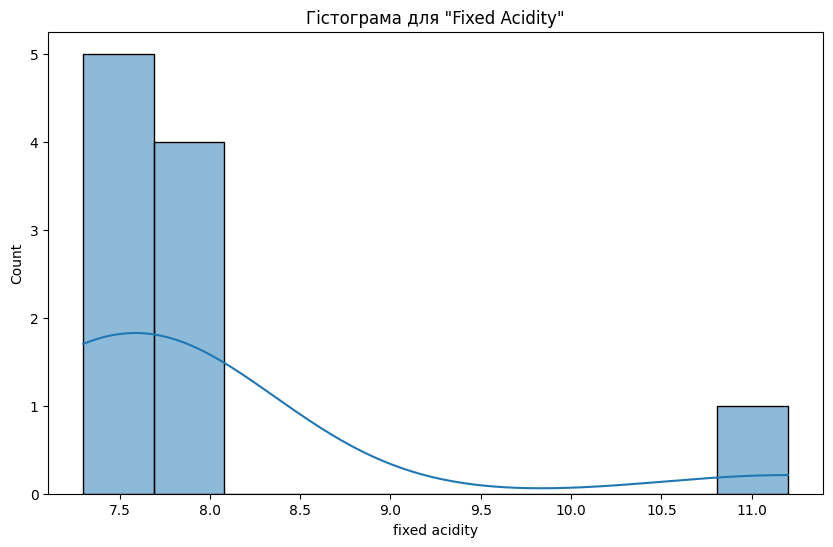

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fixed acidity'], bins=10, kde=True)
plt.title('Гістограма для "Fixed Acidity"')
plt.show()


# Блок 4 — Графік залежності

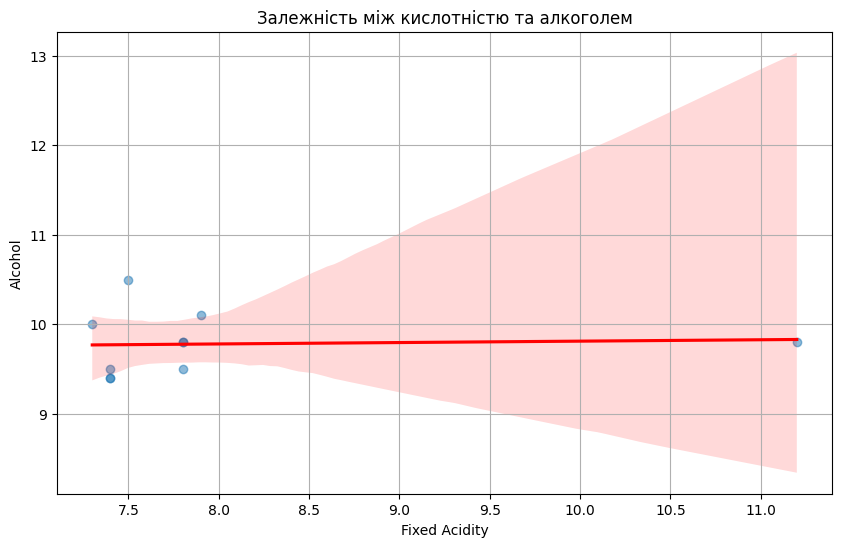

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x='fixed acidity', y='alcohol', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Залежність між кислотністю та алкоголем')
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.grid(True)
plt.show()



# Блок 5 — Коефіцієнт Пірсона та Спірмена

In [7]:
pearson_corr = df[['fixed acidity', 'citric acid']].corr(method='pearson')
spearman_corr = df[['fixed acidity', 'citric acid']].corr(method='spearman')

print("Коефіцієнт Пірсона:\n", pearson_corr)
print("Коефіцієнт Спірмена:\n", spearman_corr)


Коефіцієнт Пірсона:
                fixed acidity  citric acid
fixed acidity       1.000000     0.808586
citric acid         0.808586     1.000000
Коефіцієнт Спірмена:
                fixed acidity  citric acid
fixed acidity       1.000000     0.748936
citric acid         0.748936     1.000000


# Блок 6 — One Hot Encoding

In [8]:
df_encoded = pd.get_dummies(df, columns=['quality'], prefix='quality')

print(df_encoded.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality_5  quality_6  quality_7  
0      9.4       True      False      Fa

# Візуалізація багатовимірних даних (3D-графік)

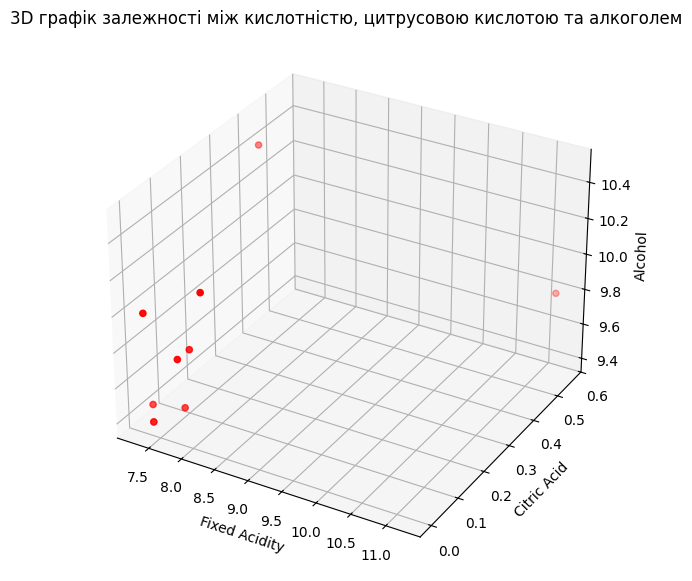

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['fixed acidity']
y = df['citric acid']
z = df['alcohol']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('Alcohol')
ax.set_title('3D графік залежності між кислотністю, цитрусовою кислотою та алкоголем')

plt.show()
